<a href="https://colab.research.google.com/gist/Larinwa/cf3a1a0f3daf6a390ac41d042b1ec30b/project_sup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNDERSTANDING AND PREDICTING THE BEHAVIOURAL PARTTERN OF ACTUATORS IN A SMART GREENHOUSE

***

### Introduction

This project aims to study the behavior of actuators in a smart greenhouse environment, focusing on their response to varying environmental conditions. Actuators, such as watering pumps and fans, play a critical role in maintaining optimal growing conditions within a greenhouse. Understanding and predicting their behavior can lead to more efficient management of resources, including water and energy.

The primary objective of this study is to develop machine learning algorithms capable of predicting actuator behavior. Specifically, the project focuses on:

###### Watering Pump Behavior: Predicting when the watering pump will turn on or off based on key environmental factors.
###### Fan Behavior:   Determining when the fan actuator will activate due to rising temperatures.

These predictions can help optimize energy usage, ensuring that the greenhouse remains energy-efficient while maintaining a suitable environment for plant growth.
The following feature variables will be utilized for these predictions:

1. Temperature (°C): The recorded temperature in degrees Celsius, which directly influences fan activation.
2. Humidity (%): The percentage of moisture in the environment, impacting the overall greenhouse climate.
3. Water Level (%): The water level as a percentage, crucial for determining when irrigation is needed.
4. Nitrogen (N): The nitrogen level in the soil, scaled from 0 to 255, indicating soil fertility.
5. Phosphorus (P): The phosphorus level in the soil, scaled from 0 to 255, another key indicator of soil health.
6. Potassium (K): The potassium level in the soil, scaled from 0 to 255, essential for plant nutrient balance.

In [ ]:
# import the libaries

import pandas as pd
import numpy as np

# data visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_style('darkgrid')
sns.set_style('darkgrid')
sns.set_palette('husl')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,f1_score

In [ ]:
# load the data

my_df = pd.read_csv('IoTProcessed_Data.csv')

### STEP 1: Data Loading and  Cleaning

In [ ]:
my_df.head()

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,2024-02-08 06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37922 entries, 0 to 37921
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     37920 non-null  object 
 1   tempreature              37922 non-null  int64  
 2   humidity                 37922 non-null  int64  
 3   water_level              37922 non-null  int64  
 4   N                        37922 non-null  int64  
 5   P                        37922 non-null  int64  
 6   K                        37922 non-null  int64  
 7   Fan_actuator_OFF         37922 non-null  float64
 8   Fan_actuator_ON          37922 non-null  float64
 9   Watering_plant_pump_OFF  37922 non-null  float64
 10  Watering_plant_pump_ON   37922 non-null  float64
 11  Water_pump_actuator_OFF  37922 non-null  float64
 12  Water_pump_actuator_ON   37922 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 3.8+ MB


In [ ]:
my_df.columns

Index(['date', 'tempreature', 'humidity', 'water_level', 'N', 'P', 'K',
       'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON'],
      dtype='object')

In [ ]:
my_df['temperature'] = my_df['tempreature']

##### Insight:
Inspecting the dataset has revealed that te total number of observations are 37922, with 13 features of which there are no missing values. Also it was noticed that a column name was mispelt, which could cause error, hence the need to address it.

## STEP 2: Split data for training and testing

In [ ]:
y1 = my_df['Watering_plant_pump_ON']  #extracting the first target/ dependenct variable
y2 = my_df['Fan_actuator_ON']  #extracting the second target/ dependenct variable

X = my_df[['temperature', 'humidity', 'water_level', 'N', 'P', 'K']]  # Features

In [ ]:
y1.value_counts()

Watering_plant_pump_ON
0.0    28900
1.0     9022
Name: count, dtype: int64

In [ ]:
y2.value_counts()

Fan_actuator_ON
0.0    26161
1.0    11761
Name: count, dtype: int64

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=42, stratify = y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_scaled, y2, test_size=0.2, random_state=42, stratify = y2)

In [ ]:
for i in[X1_train, X1_test, y1_train, y1_test]:
    print(i.shape)

(30337, 6)
(7585, 6)
(30337,)
(7585,)


In [ ]:
for i in[X2_train, X2_test, y2_train, y2_test]:
    print(i.shape)

(30337, 6)
(7585, 6)
(30337,)
(7585,)


#### Note:
Here, we extracted our dependent variables, 'Watering_pump_ON' and 'Fan_actuator_ON', and saved it in the variable 'y1' and y2 respectively. Then, some columns were assigned to X as our independent variables,they also serve aas the predictors. Next, we unpacked the outcome of the splitting function, including the random state and percentage of data for testing, into four variables: X_train, X_test, y_train, and y_test and repeated the same for the secod prediction.  To verify our process, we used a for loop to iterate through the list of the four variables and print the shape of each

## STEP 3: Build Linear regression Model

In [ ]:
model1 = RandomForestClassifier(random_state=23,
                               n_estimators=4, max_depth=3,
                               criterion='entropy')
model2 = LogisticRegression(random_state=0)
model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)

test_pred1 = model1.predict(X1_test)
train_pred1 = model1.predict(X1_train)

test_pred2 = model2.predict(X2_test)
train_pred2 = model2.predict(X2_train)

## STEP 4: Evaluate the Model Performance

In [ ]:
#Model Evaluation for the first target variable
print(f'test score for watering pump = {f1_score(y1_test, test_pred1)}')
print(f'train score for watering pump = {f1_score(y1_train, train_pred1)}')

test score for watering pump = 1.0
train score for watering pump = 0.9999307239348805


In [ ]:
#Model Evaluation for the second target variable
print(f'test score for fan actuator= {f1_score(y2_test, test_pred2)}')
print(f'train score for fan actuator = {f1_score(y2_train, train_pred2)}')

test score for fan actuator= 1.0
train score for fan actuator = 0.9998937187798916


Text(0.5, 1.0, 'Fan actuator Prediction')

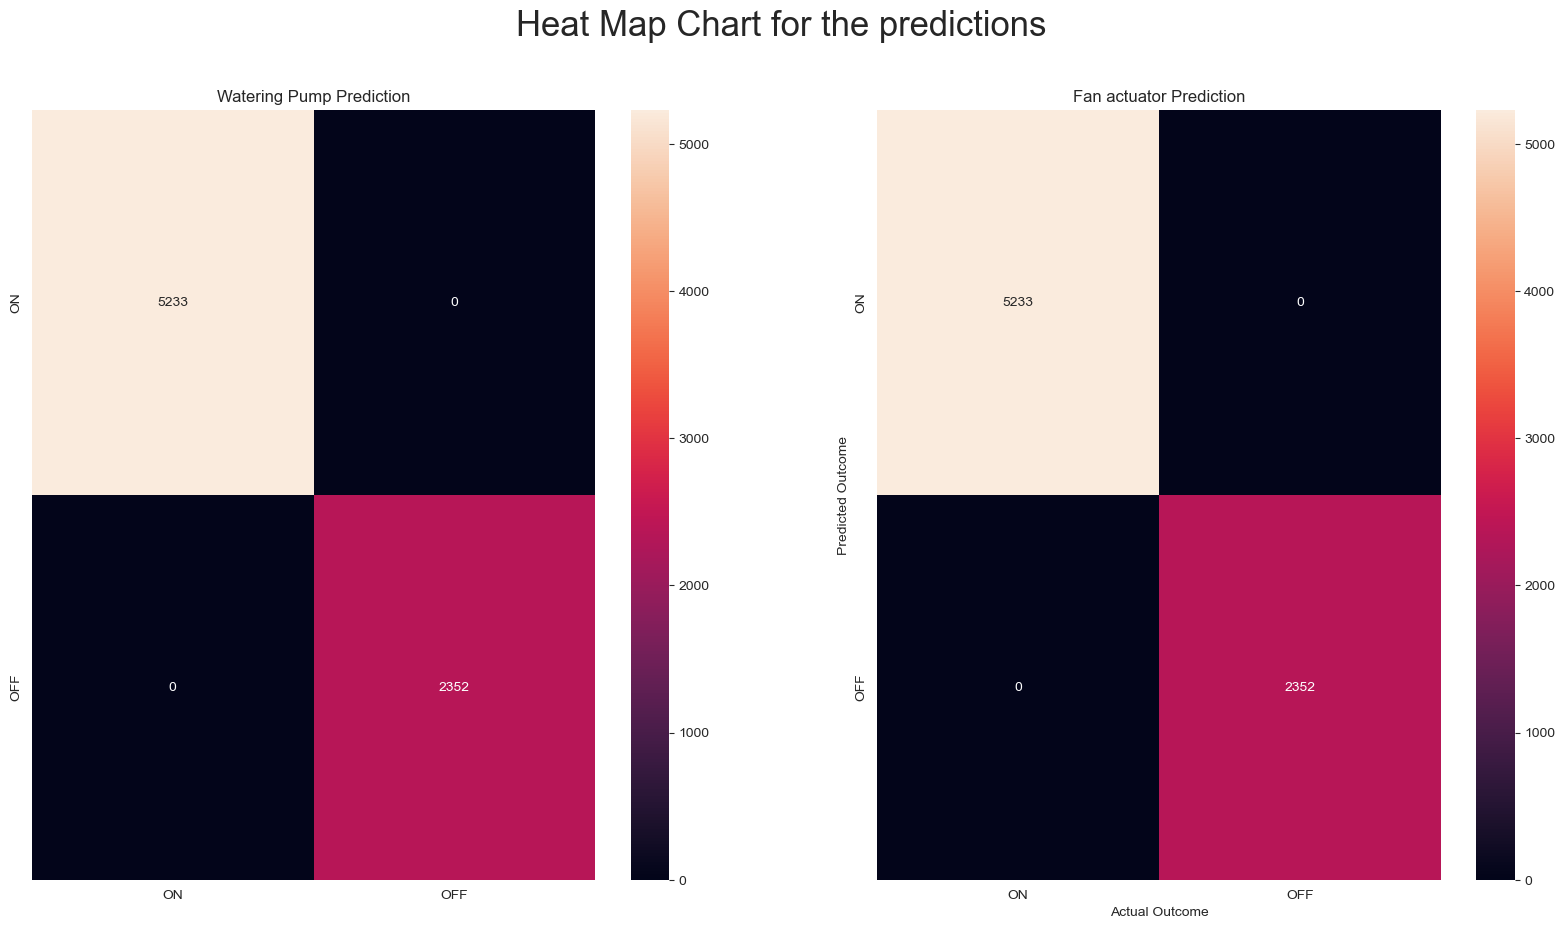

In [ ]:
confusion_2 = confusion_matrix(y1_test, test_pred1)
confusion_2 = confusion_matrix(y2_test, test_pred2)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,10))
confusion_df1 = pd.DataFrame(data=confusion_2, columns=['ON', 'OFF'],
                           index= ['ON', 'OFF'])
confusion_df2 = pd.DataFrame(data=confusion_2, columns=['ON', 'OFF'],
                           index= ['ON', 'OFF'])

sns.heatmap(confusion_df1, annot=True,fmt = '0.0f',ax = axes[0])
sns.heatmap(confusion_df2, annot=True,fmt = '0.0f',ax = axes[1])

plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.suptitle(t = "Heat Map Chart for the predictions", fontsize = 25)
axes[0].set_title("Watering Pump Prediction")
axes[1].set_title("Fan actuator Prediction")

## STEP 5: Discussion of Findings

### Conclusion
The study successfully developed predictive models to understand actuator behavior in a greenhouse using environmental conditions as features.
A Random Forest Classifier (n_estimators=4, max_depth=3) achieved near-perfect accuracy for predicting watering pump activation, with a test score of 1.0 and a train score of 0.9999, capturing non-linear relationships among features like humidity and soil nutrients.
Logistic Regression effectively predicted fan activation, with a test score of 1.0 and a train score of 0.9998, reflecting its likely linear dependence on temperature.

These models demonstrate exceptional performance.The findings provide actionable insights for optimizing greenhouse automation, enabling efficient resource and energy management.